In [ ]:
import sys
!{sys.executable} -m pip install statsmodels

In [29]:
import os
currDir=os.path.abspath(os.getcwd())
currDir

'/home/hadoop/Git_Ia/CegepSteFoy_IA/05_Eda'

In [19]:
"""
Created on Tue Mar 23 18:52:41 2021

@author: pmarc

Résolution Problème L05 - #2 par Pierre-Marc Juneau, 25 mars 2021
"""
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.robust as rb
from statistics import mode
import matplotlib as plt

In [13]:
dataPath=currDir=os.path.abspath(os.getcwd())+"/Data/Fichiers05/"

In [15]:
donnee = pd.read_csv(dataPath+'RepertoireAbresVDQv0r1.csv',index_col="ID")
#donnee = pd.read_csv(dataPath+'RepertoireAbresVDQv0r1.csv')
stats=donnee.describe()
stats

,DIAMETRE (cm)
count,132094.000000
mean,24.670341
std,21.914176
min,0.000000
25%,7.000000
50%,19.000000
75%,35.000000
max,606.000000


In [16]:
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

<AxesSubplot:ylabel='TYPE_ARBRE'>

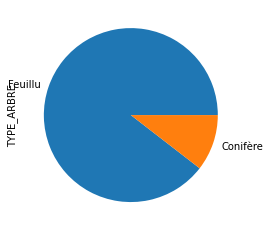

In [20]:
#Type d'arbre (feuillus vs conifères)"

typearbre_frequence = donnee["TYPE_ARBRE"].value_counts()
ax = typearbre_frequence.plot.pie()
ax

<AxesSubplot:ylabel='Nom court'>

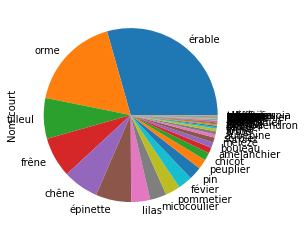

In [21]:
#"Travail pour obtenir le nom court"

donnee["NOM_FRANCAIS"]=donnee["NOM_FRANCAIS"].str.lower()

Nom_arbres_decortiques=donnee["NOM_FRANCAIS"].str.split(r"\s", n=10,expand=True)
Nom_arbres_decortiques.columns=["Nom court","","","","","",""]

X=pd.concat([donnee,Nom_arbres_decortiques["Nom court"]], axis=1)

Nom_arbres_decortiques_frequence = Nom_arbres_decortiques["Nom court"].value_counts()
ax = Nom_arbres_decortiques_frequence.plot.pie()
ax

<AxesSubplot:ylabel='Nom court'>

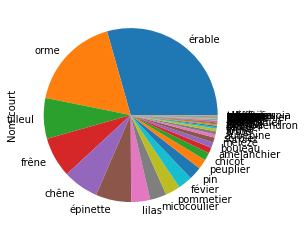

In [22]:
Nom_arbres_decortiques_frequence = Nom_arbres_decortiques["Nom court"].value_counts()
ax = Nom_arbres_decortiques_frequence.plot.pie()
ax

In [23]:
#"Travail pour obtenir le nom court filtré (au moins 5% des arbres)"

nom_court_cat=X["Nom court"].value_counts()/dimensions[0]
nom_court_cat

érable           0.293726
orme             0.174593
tilleul          0.075602
frêne            0.074701
chêne            0.066330
épinette         0.065815
lilas            0.035288
micocoulier      0.030709
pommetier        0.027741
févier           0.026515
pin              0.023987
peuplier         0.018446
chicot           0.014382
amélanchier      0.010680
bouleau          0.010158
mélèze           0.009340
sorbier          0.006002
aubépine         0.005821
arbre            0.004912
thuya            0.002982
cerisier         0.002611
saule            0.002498
phellodendron    0.001711
tremble          0.001703
noyer            0.001537
marronnier       0.001491
ostryer          0.001476
sapin            0.001370
pruche           0.001166
hêtre            0.000946
maackia          0.000817
aulne            0.000659
prunier          0.000636
platane          0.000537
amelanchier      0.000507
olivier          0.000469
poirier          0.000356
essence          0.000333
katsura     

In [24]:
nom_court_cat_filt=nom_court_cat[nom_court_cat>0.05]

In [25]:
Xfilt=pd.DataFrame([],columns=X.columns)
for i in range(nom_court_cat_filt.shape[0]):
    Xfilt=pd.concat([Xfilt,X[X["Nom court"]==nom_court_cat_filt.index[i]]],axis=0)

Text(0, 0.5, 'DIAMETRE (cm)')

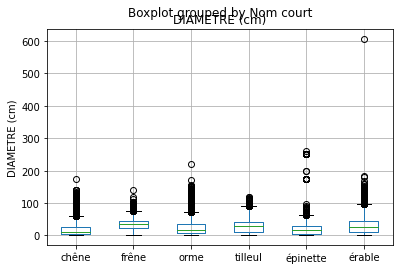

In [27]:
Nom_arbres_decort_filt_frequence = Xfilt["Nom court"].value_counts()
    

ax = Xfilt.boxplot(by="Nom court", column="DIAMETRE (cm)")
ax.set_xlabel('')
ax.set_ylabel("DIAMETRE (cm)")




           DIAMETRE (cm)
Nom court               
chêne          20.127011
frêne          34.896139
orme           25.048730
tilleul        28.876752
épinette       19.919379
érable         30.461241


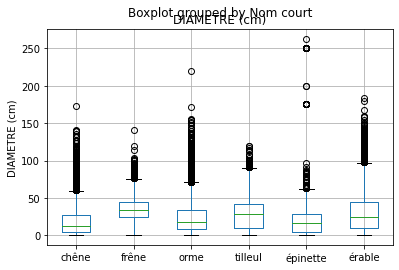

In [28]:
Xfilt2=Xfilt[Xfilt["DIAMETRE (cm)"] < 600]

ax = Xfilt2.boxplot(by="Nom court", column="DIAMETRE (cm)")
ax.set_xlabel('')
ax.set_ylabel("DIAMETRE (cm)")

print(Xfilt2.groupby(["Nom court"]).mean())